In [ ]:
#importing the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#twitter APIs
consumerKey = 'HDThWtoHaYKJkSWlCykSJb5TT'
consumerSecret = 'tY9AdGjfN2jMt6eQoi8g5Q5qq0uSMQac924bK6h2PxhEPc4E4b'
accessToken = '1286283983190396929-KSg3VjZSwIZbfUPY1OVV8tJ3zGQ3Na'
accessTokenSecret = 'HoQ6rNp7lVXZ8QrCSojBywYXCgCyJNeZUMnIiquj58MKo'

In [ ]:
#create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
#Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "SJosephBurns", count = 100, lang = "en", tweet_mode = "extended")

#print the last 10 tweets from the account
print("Show the 10 recent tweets: \n")
i=1
for tweet in posts[0:10]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i=i+1

Show the 10 recent tweets: 

1) The dollar hit four-month lows against a basket of peer currencies and gold rose for a fifth straight session to hit a fresh nine-year high: @YahooFinance

2) A great stock market mentor I recommend is @DanFitzpatrick. 

Dan is a great stock market &amp; option educator &amp; trader in all areas. 

He has a free chart pattern of the day. 

Access to Dan’s Private Trading Forum for $0.00 — 100% FREE here 👇🏻

https://t.co/icgiPqPEbM

#NTUpartner https://t.co/BjEWbyFGYr

3) @ClutchBP @johnscharts @pawan1234o @T66476371 Outstanding!

4) Reliance Industries Ltd isn’t a stock, it’s a bet on Mukesh Ambani. $RIL 🇮🇳

5) @SSalim0002 Big caps 👎🏻

6) MUSK'S SPACEX IN TALKS TO RAISE FUNDS AT $44 BILLION VALUATION: @DeItaOne

7) FREE Candlestick 101 eCourse Coupon for my followers courtesy of @MarwoodJB 👇🏻$0👇🏻

A course that reveals the historical performance of all the classic candlestick patterns, allowing you to trade with more confidence and knowledge: 

https://t

In [ ]:
#create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts] , columns=['Tweets'])

#show the first 5 rows of data
df.head()

,Tweets
0,The dollar hit four-month lows against a baske...
1,A great stock market mentor I recommend is @Da...
2,@ClutchBP @johnscharts @pawan1234o @T66476371 ...
3,"Reliance Industries Ltd isn’t a stock, it’s a ..."
4,@SSalim0002 Big caps 👎🏻


In [ ]:
#clean the text

#create a function to clean the texts
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) #removes @mentions
  text = re.sub(r'#', '', text) #removes the # symbol
  text = re.sub(r'$[A-Za-z0-9_]+', '', text) #removes the $ symbol
  text = re.sub(r'RT[\s]+', '', text) #removes RT
  text = re.sub(r'https?:\/\/\S+', '', text) # removes the hyperlink
  emoji_pattern = u'This is a smiley face \U0001f602'
  text = re.sub(emoji_pattern, '', text)

  return text

#cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,Tweets
0,The dollar hit four-month lows against a baske...
1,A great stock market mentor I recommend is . \...
2,Outstanding!
3,"Reliance Industries Ltd isn’t a stock, it’s a ..."
4,Big caps 👎🏻
...,...
95,It can be a wild one.
96,SILVER ISHARES REACH FOUR-YEAR HIGH: $SLV
97,What is a Swing Trader?
98,Best Finance Movies on Netflix


In [ ]:
#create a function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,The dollar hit four-month lows against a baske...,0.5975,0.315
1,A great stock market mentor I recommend is . \...,0.6950,0.480
2,Outstanding!,0.8750,0.625
3,"Reliance Industries Ltd isn’t a stock, it’s a ...",0.0000,0.000
4,Big caps 👎🏻,0.1000,0.000
...,...,...,...
95,It can be a wild one.,0.4000,0.100
96,SILVER ISHARES REACH FOUR-YEAR HIGH: $SLV,0.5400,0.160
97,What is a Swing Trader?,0.0000,0.000
98,Best Finance Movies on Netflix,0.3000,1.000


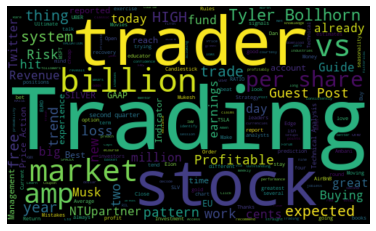

In [ ]:
#plot the word cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#create a function to compute the negative, postive and neutral analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,The dollar hit four-month lows against a baske...,0.5975,0.315,Positive
1,A great stock market mentor I recommend is . \...,0.6950,0.480,Positive
2,Outstanding!,0.8750,0.625,Positive
3,"Reliance Industries Ltd isn’t a stock, it’s a ...",0.0000,0.000,Neutral
4,Big caps 👎🏻,0.1000,0.000,Neutral
...,...,...,...,...
95,It can be a wild one.,0.4000,0.100,Positive
96,SILVER ISHARES REACH FOUR-YEAR HIGH: $SLV,0.5400,0.160,Positive
97,What is a Swing Trader?,0.0000,0.000,Neutral
98,Best Finance Movies on Netflix,0.3000,1.000,Positive


In [ ]:
# print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) The dollar hit four-month lows against a basket of peer currencies and gold rose for a fifth straight session to hit a fresh nine-year high: 

2) A great stock market mentor I recommend is . 

Dan is a great stock market &amp; option educator &amp; trader in all areas. 

He has a free chart pattern of the day. 

Access to Dan’s Private Trading Forum for $0.00 — 100% FREE here 👇🏻



NTUpartner 

3)     Outstanding!

4) FREE Candlestick 101 eCourse Coupon for my followers courtesy of  👇🏻$0👇🏻

A course that reveals the historical performance of all the classic candlestick patterns, allowing you to trade with more confidence and knowledge: 



NTUpartner 

5) It is always a good day when indexes are red but your positions are all green. 😊 $FAS $KMX $IWM

6) The Rare Trading Edge 

7) Free today:’ The Ultimate Guide to Price Action Trading' by  

Learn how to decode the markets so you can identify high probability trading setups consistently for better odds of profitably.

Click below to

In [ ]:
#print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending= False)
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j=j+1

1) The only thing that works in trading over the long term is a trading system with an edge.

2)  Second round? It’s already round 12. 

3) U.S. weekly jobless claims total 1.416 million, vs 1.3 million expected: 

4) Buying Berkshire-Hathaway stock over the past 60 years has been like hiring Warren Buffett as your fund manager. $BRK.A

5) A Moving Average Strategy that Beats Buy and Hold 

6) Common Mistakes in Technical Analysis 

7) $TSLA Q2 report, compared to consensus estimates compiled by Bloomberg

Revenue: $6.04 billion vs. $5.4 billion expected vs. $6.35 billion Y/Y

GAAP earnings per share: 50 cents, vs. GAAP loss per share of $1.06 expected &amp; GAAP loss per share of $2.31 Y/Y:   

8) $MSFT Earnings: $1.46 per share, adjusted, vs. $1.34 per share as expected by analysts.

Revenue: $38.03 billion, vs. $36.50 billion as expected by analysts:  

9) Slack accuses Microsoft of anticompetitive practices in EU complaint:  $WORK $MSFT

10) “Buying a weak stock is like betting on 

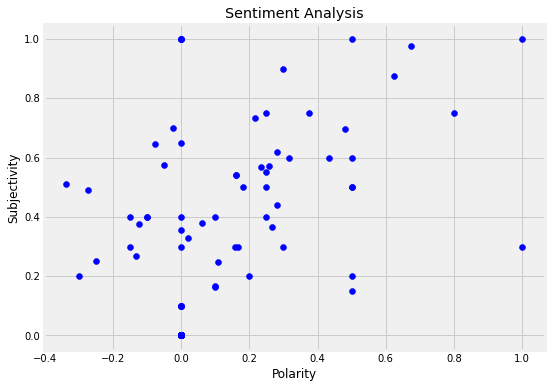

In [ ]:
#plot the polarity and the subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
#get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) *100 , 1)

39.0

In [ ]:
 #get the percentage of negative tweets
 ntweets = df[df.Analysis == 'Negative']
 ntweets = ntweets['Tweets']

 round((ntweets.shape[0] / df.shape[0]) *100 , 1)

13.0

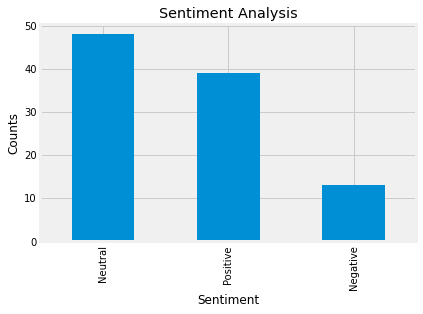

In [ ]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()